Atalov S.

# Lab 2. Simpsons

---

<img src="https://upload.wikimedia.org/wikipedia/en/c/ca/Simpsons_cast.png">

In [1]:
import os
from tqdm.autonotebook import tqdm, trange

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler

import torchvision
from torchvision import datasets, models, transforms

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

<ipython-input-1-208e511ee693>:2: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


1. –î–∞—Ç–∞—Å–µ—Ç - —Å–∫–∞—á–∞–π—Ç–µ –∏ —Ä–∞—Å–ø–∞–∫—É–π—Ç–µ –¥–∞—Ç–∞—Å–µ—Ç
2. –ú–æ–¥–µ–ª—å - –∏—Å–ø–æ–ª—å–∑—É–π—Ç–µ ResNet50 –¥–ª—è —Ç—Ä–∞–Ω—Å—Ñ–µ—Ä –ª–µ—Ä–Ω–∏–Ω–≥–∞
3. –ì—Ä–∞—Ñ–∏–∫–∏ - —Å–¥–µ–ª–∞–π—Ç–µ –∞–Ω–∞–ª–∏–∑ –ª–æ—Å—Å–æ–≤ –∏ —Ç–æ—á–Ω–æ—Å—Ç–∏
4. –¢–µ—Å—Ç - —Å–¥–µ–ª–∞–π—Ç–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ —Ç–µ—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö
5. CSV - —Å–æ—Ö—Ä–∞–Ω–∏—Ç–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–æ–π –≤ `csv`-—Ñ–∞–π–ª –∏ —Å–¥–∞–π—Ç–µ –≤–º–µ—Å—Ç–µ —Å –Ω–æ—É—Ç–±—É–∫–æ–º

## –î–∞—Ç–∞—Å–µ—Ç

```python
link = 'https://drive.google.com/uc?export=download&id=1yRuW44NkMtxDa8Szck2DYEgJblPm_n-4'

# –°–æ–∑–¥–∞–π—Ç–µ –ø–∞–ø–∫—É dataset –∫–æ–º–∞–Ω–¥–æ–π
! mkdir dataset

# –†–∞—Å–ø–∞–∫—É–π—Ç–µ zip file –≤ –ø–∞–ø–∫—É dataset –∫–æ–º–∞–Ω–¥–æ–π
! unzip -q springfield.zip -d dataset

# –ß—Ç–æ–±—ã –ø–æ–ª—É—á–∏—Ç—å —Ç–∞–∫—É—é —Å—Ç—Ä—É–∫—Ç—É—Ä—É
# /dataset/train/simpsons_dataset
```

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [5]:
import zipfile
zip_path = "/content/drive/MyDrive/Colab Notebooks/springfield.zip"
extract_to = "/content/dataset"

os.makedirs(extract_to, exist_ok=True)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

In [6]:
! mkdir dataset

mkdir: cannot create directory ‚Äòdataset‚Äô: File exists


In [7]:
# –ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –æ–±—É—á–∞—é—â–∏—Ö –¥–∞–Ω–Ω—ã—Ö –¥–ª—è —Ä–∞—Å—à–∏—Ä–µ–Ω–∏—è –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–∏ –∏ –µ—ë –Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—è
# –î–ª—è –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–æ–π (—Ç–µ—Å—Ç–æ–≤–æ–π) –≤—ã–±–æ—Ä–∫–∏ —Ç–æ–ª—å–∫–æ –Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—è
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(244),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(244),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}
# –ø–∞–ø–∫–∞ —Å –¥–∞–Ω–Ω—ã–º–∏. –ï—Å–ª–∏ –∑–∞–ø—É—Å–∫–∞–µ—Ç–µ –≤ –∫–æ–ª–∞–±–µ, –Ω—É–∂–Ω–æ —Å–∫–æ–ø–∏—Ä–æ–≤–∞—Ç—å –¥–∞–Ω–Ω—ã–µ –∫ —Å–µ–±–µ –≤ –¥–∏—Ä–µ–∫—Ç–æ—Ä–∏—é –∏ –ø—Ä–∏–º–æ–Ω—Ç–∏—Ä–æ–≤–∞—Ç—å –¥–∏—Å–∫. –ï—Å–ª–∏ –∑–∞–ø—É—Å–∫–∞–µ—Ç–µ –ª–æ–∫–∞–ª—å–Ω–æ -- –ø—Ä–æ—Å—Ç–æ —Å–∫–∞—á–∞–π—Ç–µ –¥–∞–Ω–Ω—ã–µ
data_dir = './dataset/train/simpsons_dataset'



# create the ImageFolder dataset
train_dataset = datasets.ImageFolder(root=data_dir, transform=data_transforms['train'])
val_dataset = datasets.ImageFolder(root=data_dir, transform=data_transforms['val'])

# split the dataset into training and validation sets
train_size = int(0.8 * len(train_dataset))  # 80% of the dataset will be used for training
val_size = len(train_dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(train_dataset, [train_size, val_size])

# create the data loaders
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=32, shuffle=False)


In [8]:
dataset = datasets.ImageFolder(root=data_dir, transform=None)
class_names = dataset.classes

In [9]:
dataloaders = {'train': train_loader, 'val': val_loader}
dataset_sizes = {'train': len(train_dataset), 'val': len(val_dataset)}


## –ü—Ä–∏–º–µ—Ä –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π

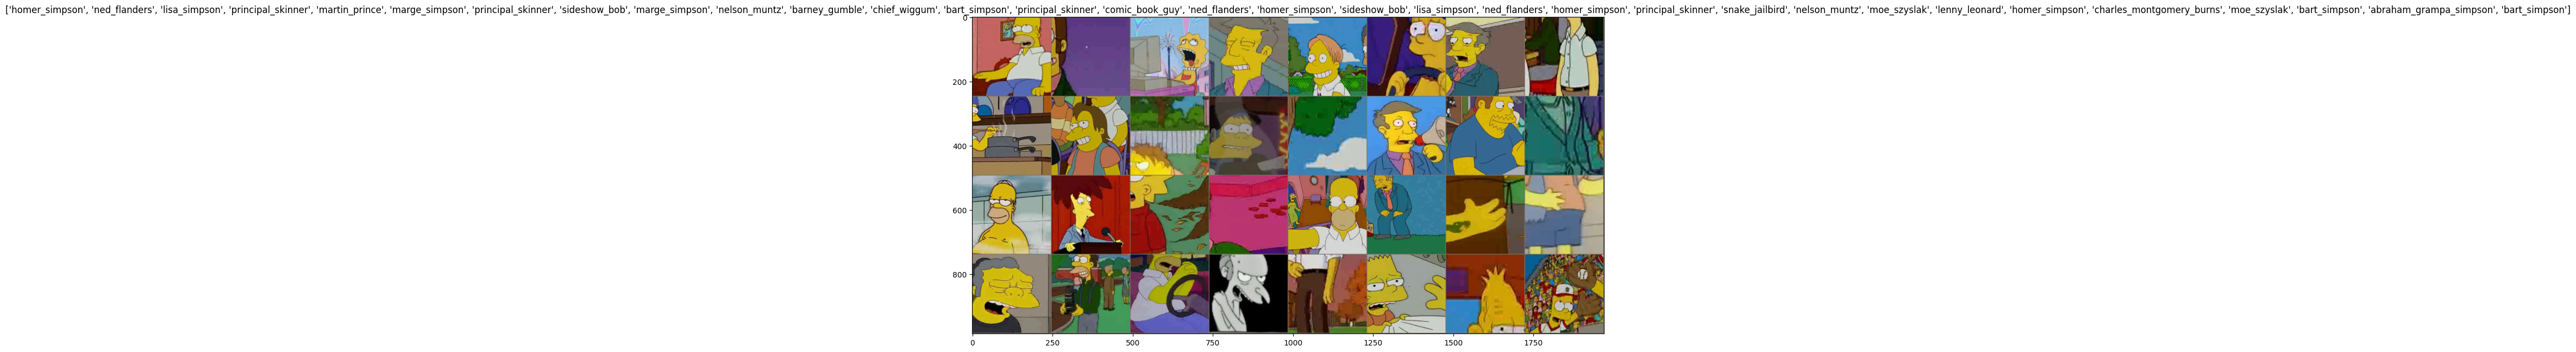

In [10]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.figure(figsize=(15, 12))
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)


# –ü–æ–ª—É—á–∏–º 1 –±–∞—Ç—á (–∫–∞—Ä—Ç–Ω–∫–∏-–º–µ—Ç–∫–∏) –∏–∑ –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–∏
inputs, classes = next(iter(train_loader))

# –†–∞—Å–ø–æ–ª–æ–∂–∏–º –∫–∞—Ä—Ç–∏–Ω–∫–∏ —Ä—è–¥–æ–º
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

## ResNet50

–°–¥–µ–ª–∞–π—Ç–µ —Ç—Ä–∞–Ω—Å—Ñ–µ—Ä –ª–µ—Ä–Ω–∏–Ω–≥ –¥–∞–Ω–Ω–æ–π –º–æ–¥–µ–ª–∏ –¥–ª—è —Ç–µ–∫—É—â–µ–≥–æ –¥–∞—Ç–∞—Å–µ—Ç–∞. –ò—Å–ø–æ–ª—å–∑—É–π—Ç–µ –ø—Ä–∏–º–µ—Ä –∫–æ–¥–∞ –∏–∑ –∫–ª–∞—Å—Å–Ω–æ–π —Ä–∞–±–æ—Ç—ã.

- –ù–µ–æ–±—Ö–æ–¥–∏–º–æ –ø—Ä–æ–≥–Ω–∞—Ç—å 10 —ç–ø–æ—Ö
- –ü–æ–∫–∞–∂–∏—Ç–µ –ª–æ—Å—Å—ã –Ω–∞ —Ç—Ä–µ–π–Ω–µ –∏ –≤–∞–ª–∏–¥–∞—Ü–∏–∏
- –ü–æ–∫–∞–∂–∏—Ç–µ —Ç–æ—á–Ω–æ—Å—Ç—å –≤–∞—à–µ–π –º–æ–¥–µ–ª–∏ –Ω–∞ —Ç—Ä–µ–π–Ω–µ –∏ –≤–∞–ª–∏–¥–∞—Ü–∏–∏

### –ò—Å–ø–æ–ª—å–∑—É–π—Ç–µ GPU (Google Colab)

In [11]:
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
from torchvision import models
import torch

In [12]:
model = models.resnet50(pretrained=True)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 97.8M/97.8M [00:00<00:00, 205MB/s]


In [13]:
from pathlib import Path
TRAIN_DIR = Path('dataset/train/simpsons_dataset')
TEST_DIR = Path('dataset/testset/testset')
# –ü–æ–∏—Å–∫ –≤—Å–µ—Ö —Ñ–∞–π–ª–æ–≤ 
# rglob('*.jpg') ‚Äî –∏—â–µ—Ç —Ä–µ–∫—É—Ä—Å–∏–≤–Ω–æ –≤—Å–µ .jpg —Ñ–∞–π–ª—ã (–≤ —Ç–æ–º —á–∏—Å–ª–µ –≤ –ø–æ–¥–ø–∞–ø–∫–∞—Ö)
train_val_files = sorted(list(TRAIN_DIR.rglob('*.jpg')))
test_files = sorted(list(TEST_DIR.rglob('*.jpg')))

In [14]:
from sklearn.model_selection import train_test_split
# —Å–ø–∏—Å–æ–∫ –≤—Å–µ—Ö .jpg —Ñ–∞–π–ª–æ–≤ –∏–∑ –æ–±—É—á–∞—é—â–µ–π –ø–∞–ø–∫–∏
train_val_labels = [path.parent.name for path in train_val_files]
# 25% —Ñ–∞–π–ª–æ–≤ –ø–æ–π–¥—É—Ç –≤ –≤–∞–ª–∏–¥–∞—Ü–∏—é, 75% ‚Äî –≤ –æ–±—É—á–µ–Ω–∏–µ
train_files, val_files = train_test_split(train_val_files, test_size=0.25, \
                                          stratify=train_val_labels) # —Ä–∞–∑–±–∏–µ–Ω–∏–µ –±—É–¥–µ—Ç –ø—Ä–æ–ø–æ—Ä—Ü–∏–æ–Ω–∞–ª—å–Ω–æ –∫–ª–∞—Å—Å–∞–º

In [15]:
n_classes = len(np.unique(train_val_labels))
print("–ö–æ–ª-–≤–æ –∫–ª–∞—Å—Å–æ–≤ :{}".format(n_classes))

–ö–æ–ª-–≤–æ –∫–ª–∞—Å—Å–æ–≤ :42


In [16]:
print("–†–∞–∑–º–µ—Ä –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–∏: {}".format(len(train_files)))

–†–∞–∑–º–µ—Ä –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–∏: 15699


In [17]:
model = torchvision.models.resnet50(weights="IMAGENET1K_V2")

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 97.8M/97.8M [00:00<00:00, 125MB/s]


In [18]:
# in_features=2048 ‚Äî –º–æ–¥–µ–ª—å "—Å–æ–±–∏—Ä–∞–µ—Ç" 2048 –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ —Å –ø—Ä–µ–¥—ã–¥—É—â–µ–≥–æ —Å–ª–æ—è

# out_features=1000 ‚Äî –≤—ã–¥–∞—ë—Ç –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –ø–æ 1000 –∫–ª–∞—Å—Å–∞–º (—ç—Ç–æ –∫–ª–∞—Å—Å—ã ImageNet)

# bias=True ‚Äî –≤–∫–ª—é—á–∞–µ—Ç —Å–º–µ—â–µ–Ω–∏–µ (bias) –≤ —Å–ª–æ–µ, –∫–∞–∫ –æ–±—ã—á–Ω–æ –≤ nn.Linear

model.fc

Linear(in_features=2048, out_features=1000, bias=True)

In [19]:
model.fc = nn.Linear(2048, n_classes)

In [20]:
DEVICE = torch.device("cuda")

In [21]:
model = model.to(DEVICE)

In [22]:
# —Ñ—É–Ω–∫—Ü–∏—è –æ–±—É—á–µ–Ω–∏—è –∑–∞ –æ–¥–Ω—É —ç–ø–æ—Ö—É
def fit_epoch(model, train_loader, criterion, optimizer):
    total_loss = 0.0 # —Å—É–º–º–∞ –≤—Å–µ—Ö –ø–æ—Ç–µ—Ä—å
    total_correct = 0 # –∫–æ–ª-–≤–æ –ø—Ä–∞–≤–∏–ª—å–Ω–æ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã—Ö –ø—Ä–∏–º–µ—Ä–æ–≤
    total_samples = 0 # —Å–∫–æ–ª—å–∫–æ –¥–∞–Ω–Ω—ã—Ö —É–∂–µ –ø—Ä–æ—à–ª–æ
    # –ø—Ä–æ—Ö–æ–¥ –ø–æ –±–∞—Ç—á–∞–º
    for x, y in train_loader: # x - –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è , y - —Ä–µ–∞–ª—å–Ω—ã–µ –∫–ª–∞—Å—Å—ã
        x, y = x.to(DEVICE) , y.to(DEVICE)
        optimizer.zero_grad()
        outputs = model(x)
        loss = criterion(outputs, y)
        loss.backward()
        optimizer.step()

        preds = torch.argmax(outputs, 1)
        total_loss += loss.item() * x.size(0)
        total_correct += torch.sum(preds == y).item()
        total_samples += x.size(0)

    train_loss = total_loss / total_samples
    train_acc = total_correct / total_samples

    return train_loss, train_acc

In [23]:
def eval_epoch(model, val_loader, criterion):
    model.eval()
    total_loss = 0.0           # —Å—É–º–º–∞ –ø–æ—Ç–µ—Ä—å
    total_correct = 0          # –≤–µ—Ä–Ω—ã–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è
    total_samples = 0          # –≤—Å–µ–≥–æ –æ–±—Ä–∞–±–æ—Ç–∞–Ω–æ

    with torch.no_grad():      # –æ—Ç–∫–ª—é—á–µ–Ω–∏–µ –≥—Ä–∞–¥–∏–µ–Ω—Ç–æ–≤
        for x, y in val_loader:
            x, y = x.to(DEVICE), y.to(DEVICE)
            outputs = model(x)
            loss = criterion(outputs, y)

            preds = torch.argmax(outputs, 1)
            total_loss += loss.item() * x.size(0)
            total_correct += torch.sum(preds == y).item()
            total_samples += x.size(0)

    val_loss = total_loss / total_samples
    val_acc = total_correct / total_samples
    return val_loss, val_acc


In [24]:
criterion = nn.CrossEntropyLoss()
opt = torch.optim.Adam(model.parameters(), lr=0.001)
scheduler = torch.optim.lr_scheduler.StepLR(opt, step_size=4, gamma=0.1)

EPOCHS = 10
for epoch in range(1, EPOCHS + 1):
    print(f"\nüü° Epoch {epoch}/{EPOCHS}")

    model.train()
    train_loss, train_acc = fit_epoch(model, train_loader, criterion, opt)
    print(f"üü¢ Train | Loss: {train_loss:.4f} | Accuracy: {train_acc:.4f}")
    model.eval()
    val_loss, val_acc = eval_epoch(model, val_loader, criterion)
    print(f"üîµ Val   | Loss: {val_loss:.4f} | Accuracy: {val_acc:.4f}")
    scheduler.step()


üü° Epoch 1/10
üü¢ Train | Loss: 1.3168 | Accuracy: 0.6630
üîµ Val   | Loss: 1.4281 | Accuracy: 0.6585

üü° Epoch 2/10
üü¢ Train | Loss: 0.7733 | Accuracy: 0.7964
üîµ Val   | Loss: 0.8724 | Accuracy: 0.7779

üü° Epoch 3/10
üü¢ Train | Loss: 0.6792 | Accuracy: 0.8180
üîµ Val   | Loss: 0.8650 | Accuracy: 0.7786

üü° Epoch 4/10
üü¢ Train | Loss: 0.5829 | Accuracy: 0.8454
üîµ Val   | Loss: 0.6827 | Accuracy: 0.8297

üü° Epoch 5/10
üü¢ Train | Loss: 0.4596 | Accuracy: 0.8810
üîµ Val   | Loss: 0.4548 | Accuracy: 0.8799

üü° Epoch 6/10
üü¢ Train | Loss: 0.3966 | Accuracy: 0.8963
üîµ Val   | Loss: 0.4073 | Accuracy: 0.8882

üü° Epoch 7/10
üü¢ Train | Loss: 0.3708 | Accuracy: 0.9050
üîµ Val   | Loss: 0.4060 | Accuracy: 0.8923

üü° Epoch 8/10
üü¢ Train | Loss: 0.3480 | Accuracy: 0.9084
üîµ Val   | Loss: 0.4052 | Accuracy: 0.8992

üü° Epoch 9/10
üü¢ Train | Loss: 0.3515 | Accuracy: 0.9092
üîµ Val   | Loss: 0.3827 | Accuracy: 0.9040

üü° Epoch 10/10
üü¢ Train | Loss: 

## –î–µ–ª–∞–µ–º –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ –¥–ª—è —Ç–µ—Å—Ç–æ–≤—ã—Ö –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π –∏ —Å–æ—Ö—Ä–∞–Ω–∏—è–µ–º `csv` file

In [25]:

# –ø–∞–ø–∫–∞ —Å –¥–∞–Ω–Ω—ã–º–∏. –ï—Å–ª–∏ –∑–∞–ø—É—Å–∫–∞–µ—Ç–µ –≤ –∫–æ–ª–∞–±–µ, –Ω—É–∂–Ω–æ —Å–∫–æ–ø–∏—Ä–æ–≤–∞—Ç—å –¥–∞–Ω–Ω—ã–µ –∫ —Å–µ–±–µ –≤ –¥–∏—Ä–µ–∫—Ç–æ—Ä–∏—é –∏ –ø—Ä–∏–º–æ–Ω—Ç–∏—Ä–æ–≤–∞—Ç—å –¥–∏—Å–∫. –ï—Å–ª–∏ –∑–∞–ø—É—Å–∫–∞–µ—Ç–µ –ª–æ–∫–∞–ª—å–Ω–æ -- –ø—Ä–æ—Å—Ç–æ —Å–∫–∞—á–∞–π—Ç–µ –¥–∞–Ω–Ω—ã–µ
data_dir = './dataset/testset'

# create the ImageFolder dataset
test_dataset = datasets.ImageFolder(root=data_dir, transform=data_transforms['val'])

# create the data loaders
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False)


In [26]:
file_names = [path.split('/')[-1] for path, _ in test_dataset.imgs]

In [27]:
# Make predictions
def predict(loader, model):
    y_pred = np.array([])
    model.eval()
    with torch.no_grad():
        for x, _ in loader:
            x = x.cuda()
            scores = model(x).softmax(dim=1)
            _, predictions = scores.max(1)
            y_pred = np.append(y_pred, predictions.cpu().numpy(), axis=0)
    model.train()
    return y_pred

In [29]:
y_pred = predict(test_loader, model)
y_pred = y_pred.astype('int')

In [30]:
predictions = pd.DataFrame({
    'Id': file_names,
    'Expected': [class_names[i] for i in y_pred]
})

In [31]:
predictions = predictions.sort_values(by='Id')

In [33]:
predictions.to_csv("submission.csv", index=False)